Ideas:
1. I can compare multiple things to the time it takes to complete this survey, such as education to testelapse.
2. I can also make a target column by getting the mean number of all the questions.

Hi everyone! So for this analysis I've decided to try something a little different. What I'm doing to do is use the personal questions along with some other variables to try and predict what someone's answer to Q_A question would be. I will also be doing EDA to gain a better understanding of unique features in the data and help us understand more about the people doing these tests.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None 

In [2]:
df = pd.read_csv('data.csv', sep = '\t')
df.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


In [3]:
df.shape

(39775, 172)

In [4]:
df.columns

Index(['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E', 'Q4A',
       ...
       'screensize', 'uniquenetworklocation', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'major'],
      dtype='object', length=172)

In [5]:
df.describe()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize
count,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,...,39775.000000,39775.000000,39775.000000,39775.00000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000
mean,2.619485,21.555977,6.970591e+03,2.172269,21.248070,5.332376e+03,2.226097,21.583004,7.426446e+03,1.950170,...,23.612168,1.274519,1.200025,1.13516,7.555852,1.642992,31.312885,1.705795,1.159547,3.510270
std,1.032117,12.133621,8.670513e+04,1.111563,12.125288,2.651361e+04,1.038526,12.115637,1.587024e+05,1.042218,...,21.581722,0.446277,0.400024,0.40030,3.554395,1.351362,25.871272,0.473388,0.445882,2.141518
min,1.000000,1.000000,1.800000e+02,1.000000,1.000000,1.760000e+02,1.000000,1.000000,-1.081400e+04,1.000000,...,13.000000,1.000000,1.000000,0.00000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000
25%,2.000000,11.000000,2.664000e+03,1.000000,11.000000,2.477000e+03,1.000000,11.000000,2.857000e+03,1.000000,...,18.000000,1.000000,1.000000,1.00000,4.000000,1.000000,10.000000,1.000000,1.000000,2.000000
50%,3.000000,22.000000,3.609000e+03,2.000000,21.000000,3.511000e+03,2.000000,22.000000,3.898000e+03,2.000000,...,21.000000,1.000000,1.000000,1.00000,10.000000,1.000000,10.000000,2.000000,1.000000,3.000000
75%,4.000000,32.000000,5.358000e+03,3.000000,32.000000,5.216000e+03,3.000000,32.000000,5.766000e+03,3.000000,...,25.000000,2.000000,1.000000,1.00000,10.000000,2.000000,60.000000,2.000000,1.000000,4.000000
max,4.000000,42.000000,1.210228e+07,4.000000,42.000000,2.161057e+06,4.000000,42.000000,2.858269e+07,4.000000,...,1998.000000,2.000000,2.000000,3.00000,12.000000,5.000000,70.000000,2.000000,3.000000,133.000000


In [6]:
def column_fixer(name_arr):
    new_names = []
    for name in name_arr:
        if 'I' in name and 'Q' in name:
            name = name.split('I')[0] + 'Position'
            new_names.append(name)
        elif 'E' in name and 'Q' in name:
            name = name.split('E')[0] + 'Time'
            new_names.append(name)
        else:
            new_names.append(name)
    return new_names

df.columns = column_fixer(list(df.columns))

In [7]:
def pos(columns):
    for col in columns:
        if 'Q' and'Time' in col:
            df[col] = df[col]/1000
            df.drop(df[df[col] > 200].index, inplace = True)
pos(list(df.columns))

In [8]:
df['gender'].value_counts()

2    29221
1     8452
3      536
0       66
Name: gender, dtype: int64

# Demographics

First lets take a look at the gender of everyone who took the survey.

<AxesSubplot:xlabel='gender_named', ylabel='count'>

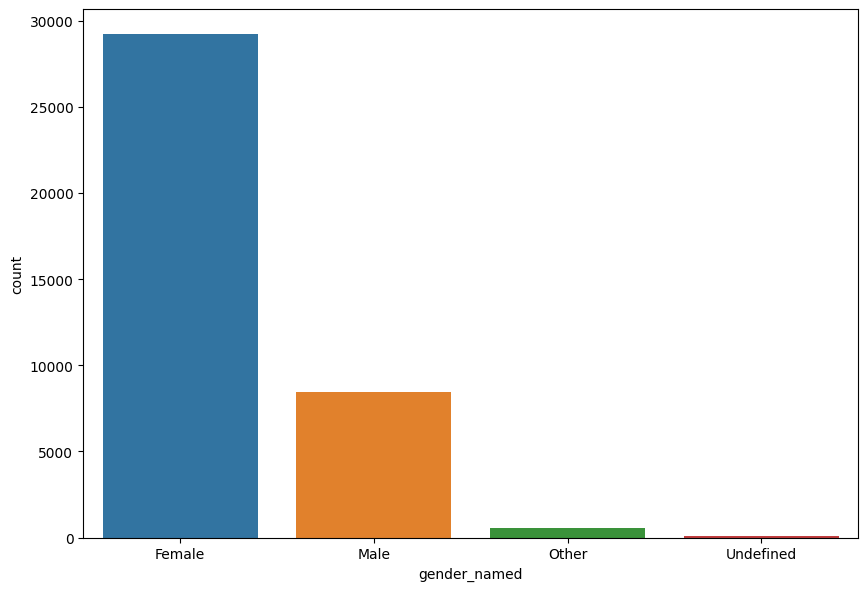

In [9]:
df['gender_named'] = df['gender'].map({0 : 'Undefined', 1 : 'Male', 2 : 'Female', 3 : 'Other'})
df_gen = pd.DataFrame(data = df['gender_named'], columns = ['gender_named'])
plt.figure(figsize = (10, 7), dpi = 100)
sns.countplot(data = df_gen, x = 'gender_named')

So the survey is overwhelmingly taken by females compared to any other gender, the next highest gender of males doesn't even come halfway.

Lets now add age into the mix and see how that affects the data.

Alright so something to note and also forgot to take into consideration is that people can lie on these types of surveys. For example the max age in the dataset is 1,998 which is of course impossible. To counter this, I will set the max age to be 110 years old and the min age to be 5 years old

<AxesSubplot:xlabel='age', ylabel='count'>

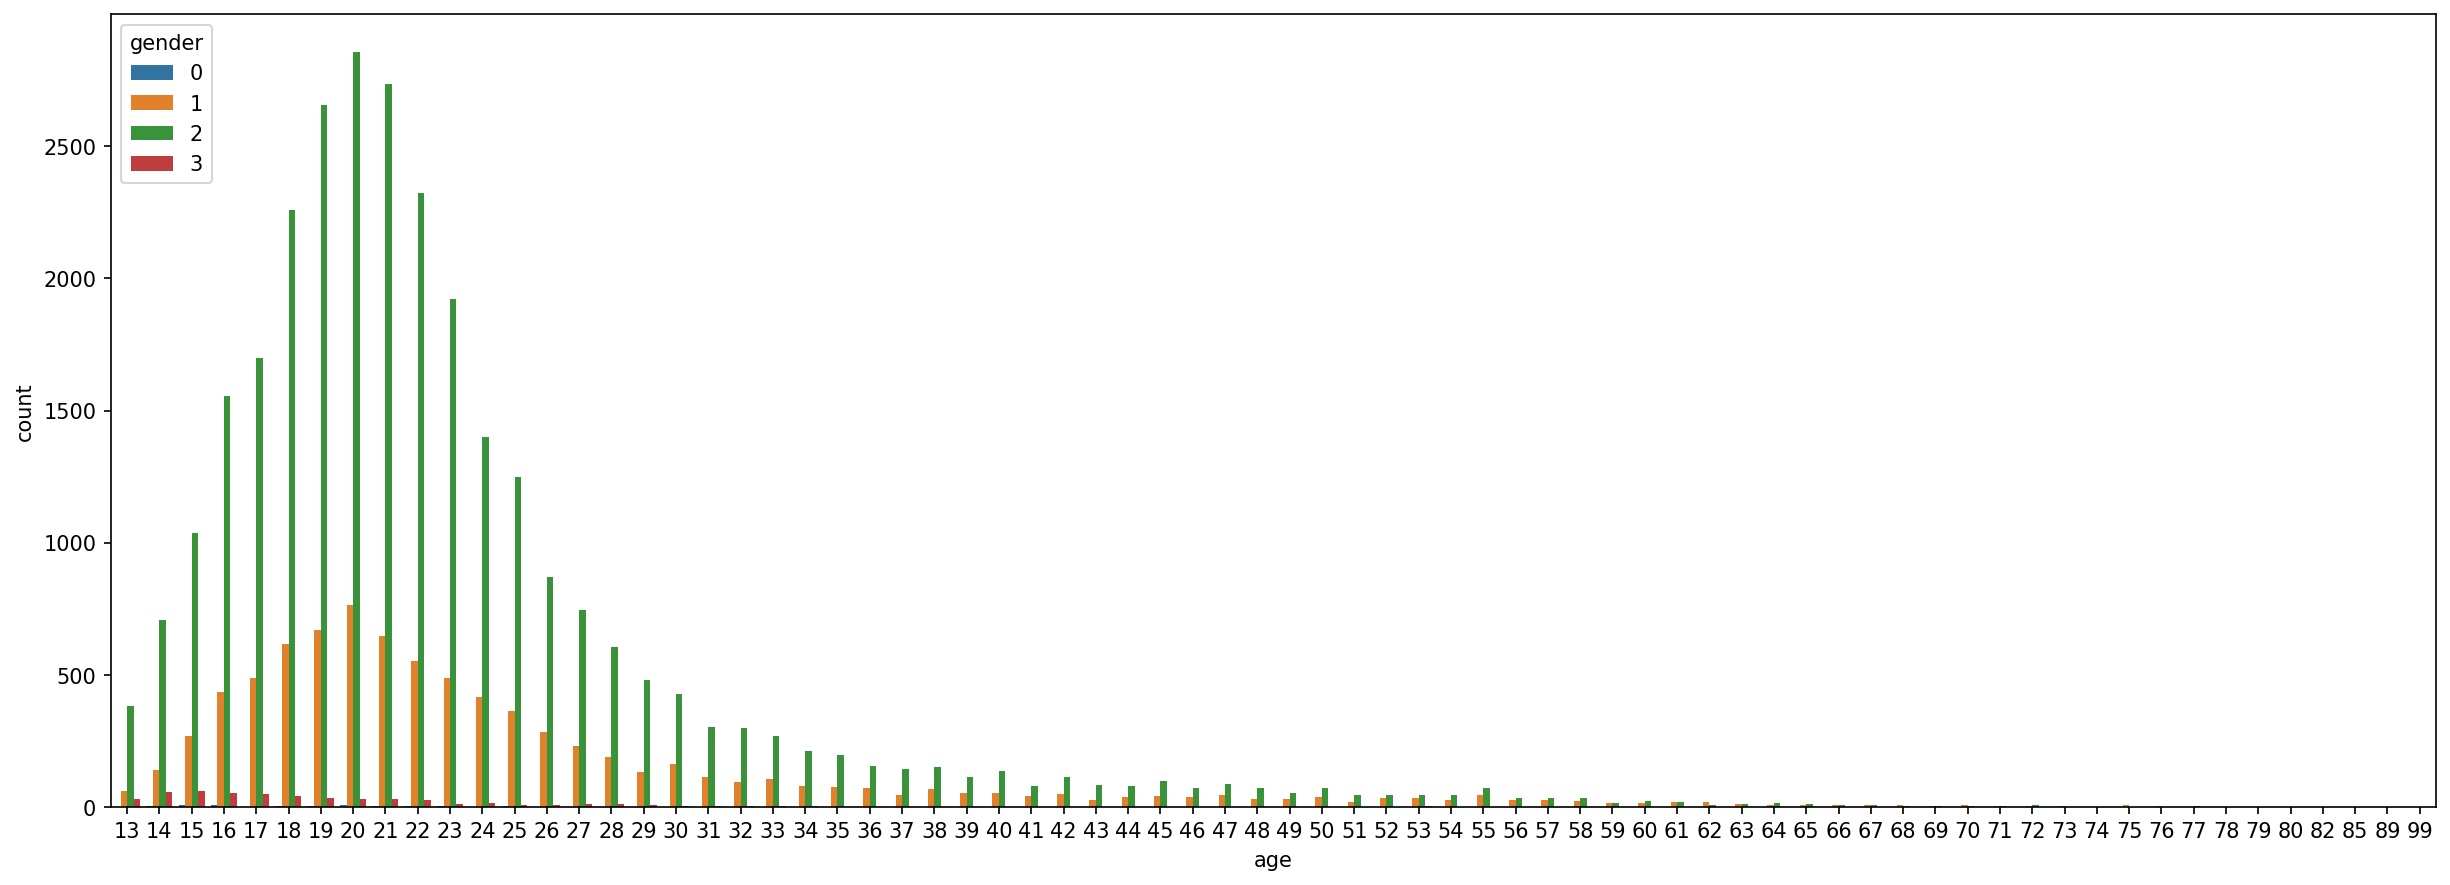

In [10]:
df = df[(df['age'] <= 110) & (df['age'] > 5)][df.columns]
df_age = df[['age', 'gender']]
plt.figure(figsize = (20, 7), dpi = 150)
sns.countplot(data = df_age, x = 'age', hue = 'gender')

The data is heavily skewed to the right which makes sense considering most people who take the survey will most likely be around a younger age. We can see that most people were around 20 years old with females being the bigger category for almost every age.

Let's see how educated people are in the survey based on their race and family size. We can also look at how educated people are based on their dominant hand since they say people who are left handed tend to be smarter. 

In [11]:
df_ed = df[['education', 'race', 'familysize', 'hand']]
df_ed['race'] = df_ed['race'].map({10 : 'Asian', 20 : 'Arab', 30 : 'Black', 40 : 'Indigenous Australian', 50 : 'Native American', 60 : 'White', 70 : 'Other'})
df_ed['familysize'] = df_ed[df_ed['familysize'] < 10]['familysize']
df_ed['education'] = df_ed['education'].map({1 : 'Less than high school', 2 : 'High school', 3 : 'University degree', 4 : 'Graduate degree'})

<AxesSubplot:xlabel='race', ylabel='Percentage educated (each race adds up to 100%)'>

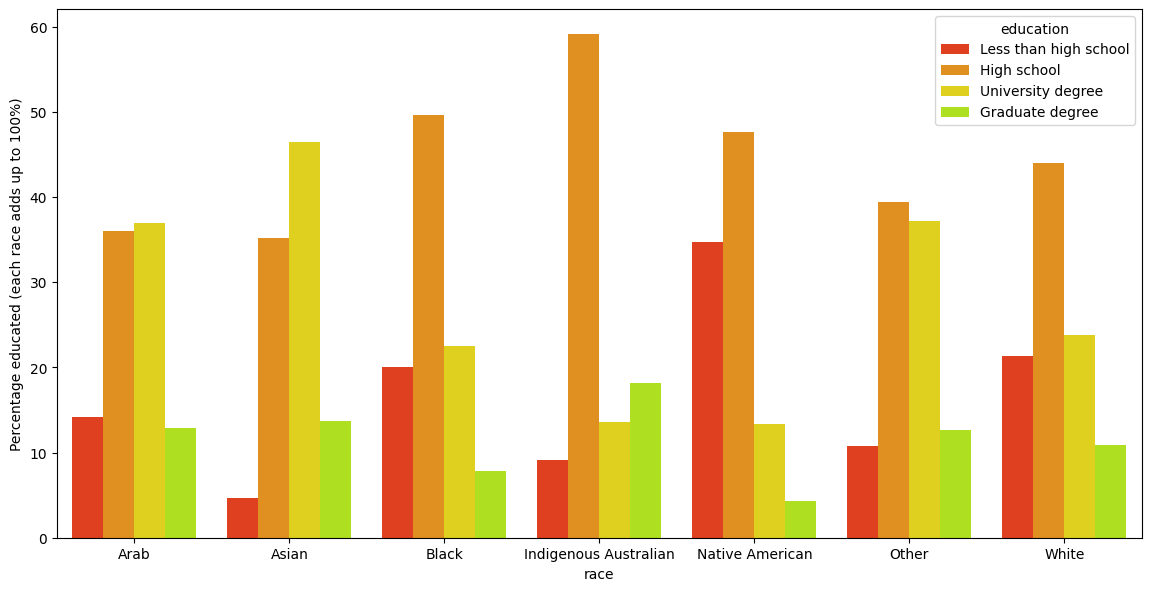

In [12]:
df_race = pd.DataFrame(df_ed.groupby(['race', 'education'])['education'].count()/df_ed.groupby('race')['education'].count()*100)
df_race = df_race.rename(columns = {'education' : 'Percentage educated (each race adds up to 100%)'})
df_race = df_race.reset_index()
plt.figure(figsize = (14, 7), dpi = 100)
sns.barplot(data = df_race, x = 'race', y = 'Percentage educated (each race adds up to 100%)', hue = 'education', hue_order=['Less than high school', 'High school', 'University degree', 'Graduate degree'], palette = 'prism')

So looking at this data we can gather a lot about the education of each person based on their race. It seems that most races were currently in highschool at the time of the interview or their max education was highschool. 

Asians and Arabs stand out a bit because most people actually had an education of at least a university degree.

Native Americans seem to have a very large percentage of the population who have not even obtained a high school degree which is a bit worrying. White and black people seem to be experiencing the same thing with around 20% of the population not even obtaining a high school degree (again this could be because they haven't graduated yet remember that most people that took this survey were on the younger side)

We do need to becareful when considering the data however because while asians had about 22,808 participants in the survey, indigenous Australians only had 22 meaning we can't exactly make reliable predictions.

In [13]:
df_ed.groupby('race')['education'].count()

race
Arab                       311
Asian                    21912
Black                      574
Indigenous Australian       22
Native American            210
Other                     4563
White                    10179
Name: education, dtype: int64

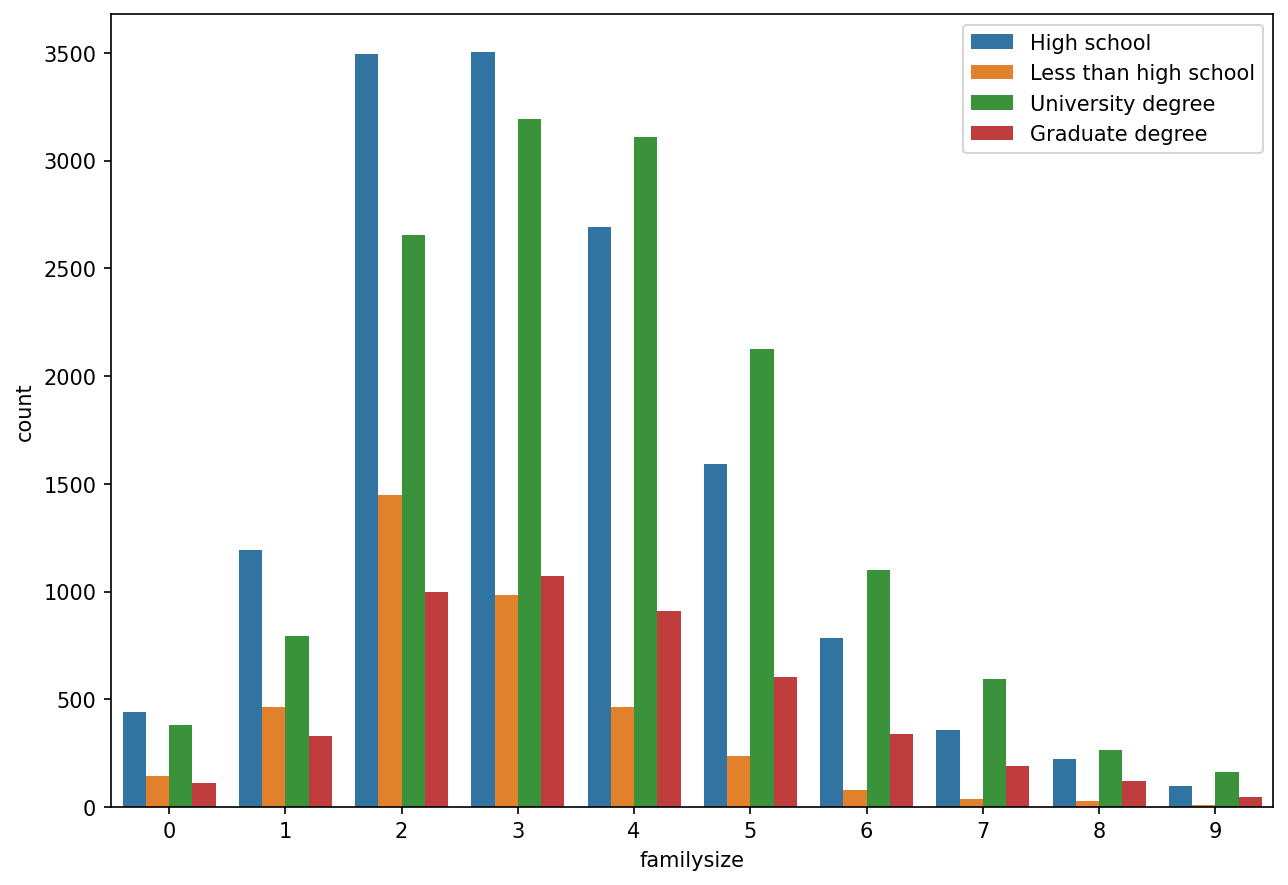

In [14]:
df_ed['familysize'] = df_ed['familysize'].astype(str).apply(lambda x: x.replace('.0',''))
plt.figure(figsize = (10, 7), dpi = 150)
sns.countplot(data = df_ed, x = 'familysize', hue = 'education', order = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.legend(loc = 'upper right')

Interestingly enough, it seems that families with more children tend to have university degrees while families with less children have mostly only graduated high school.

Now, people could easily be lying about the amount of people in their family or their degree which is fairly common. Also, it could be that most of the people with a small family size who are doing the survey have just graduated high school.

In [15]:
df_ed.columns

Index(['education', 'race', 'familysize', 'hand'], dtype='object')

In [16]:
df_ed = df_ed.drop(df_ed[df_ed['hand'] == 0].index)
df_ed['hand'] = df_ed['hand'].map({1 : 'Right handed', 2 : 'Left handed', 3 : 'Ambidextrous'})
handed = pd.DataFrame(df_ed.groupby(['education', 'hand'])['hand'].count())
handed.columns = ['Total Percentage of Handed People (Each hand adds up to 1)']
handed = handed.reset_index()
def hands(hand, value):
    if(hand == 'Ambidextrous'):
        return value/handed[handed['hand'] == 'Ambidextrous']['Total Percentage of Handed People (Each hand adds up to 1)'].sum()
    elif(hand == 'Left handed'):
        return value/handed[handed['hand'] == 'Left handed']['Total Percentage of Handed People (Each hand adds up to 1)'].sum()
    else:
        return value/handed[handed['hand'] == 'Right handed']['Total Percentage of Handed People (Each hand adds up to 1)'].sum()

handed['Total Percentage of Handed People (Each hand adds up to 1)'] = np.vectorize(hands)(handed['hand'], handed['Total Percentage of Handed People (Each hand adds up to 1)'])

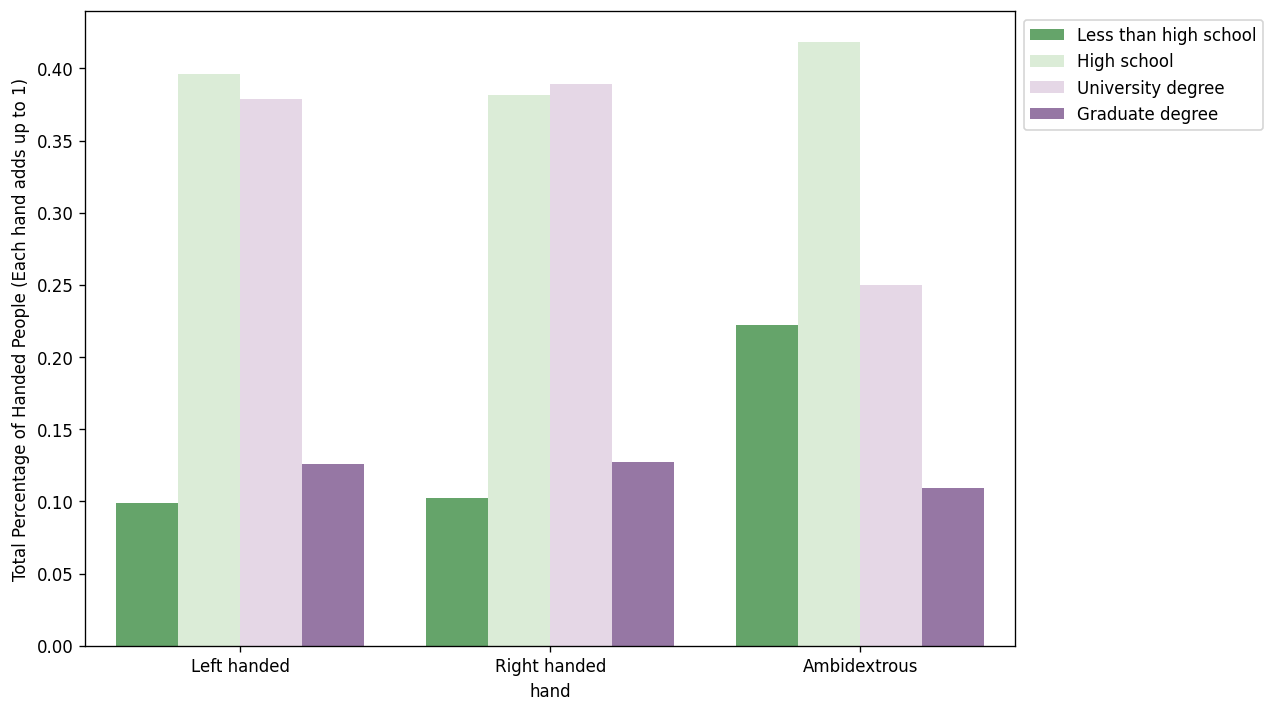

In [17]:
plt.figure(figsize = (10, 7), dpi = 120)
sns.barplot(data = handed, x = 'hand', y = 'Total Percentage of Handed People (Each hand adds up to 1)', hue = 'education', palette = 'PRGn_r', hue_order=['Less than high school', 'High school', 'University degree', 'Graduate degree'], order = ['Left handed', 'Right handed', 'Ambidextrous'])
plt.legend(bbox_to_anchor = (1, 1))

In [18]:
df_ed['hand'].value_counts()

Right handed    33424
Left handed      4009
Ambidextrous      671
Name: hand, dtype: int64

So it seems like people who are left handed are actually a bit less educated than those who are right handed. Ambidextrous seems to have been hit the hardest with almost an equal amount of people who haven't graduated high school and those who have a university degree. Then again, we don't have nearly as many people who are ambidextrious compared to those who are left handed or right handed.

Alright now lets move on to some more interesting questions, first let's take a look at if we can determine someone's answers to the questions based on their outside experiences and the time it took for them to answer the question

In [19]:
df_pred = df.copy()
def reaction(col):
    for pos in col:
        if 'Q' and 'A' in pos:
            df_pred[pos] = df[pos].map({1 : 'Did not apply to me at all', 2 : 'Some of the time', 3 : 'Good part of the time', 4 : 'Most of the time'})
reaction(list(df_pred.columns))


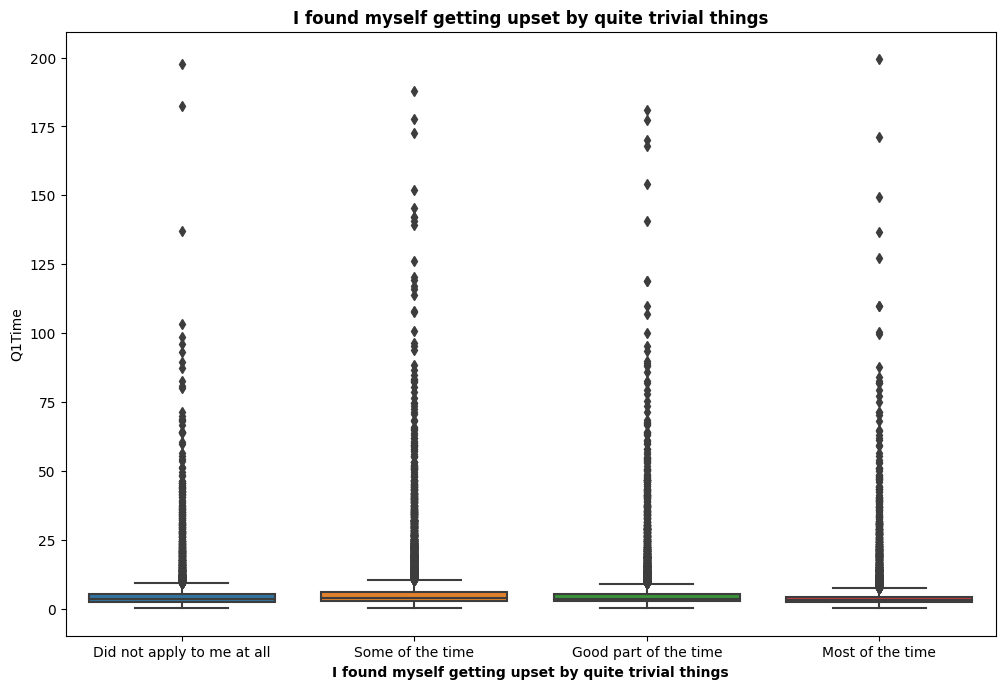

In [20]:
plt.figure(figsize = (12, 8), dpi = 100)
sns.boxplot(data = df_pred, x = 'Q1A', y = 'Q1Time', order = ['Did not apply to me at all', 'Some of the time', 'Good part of the time', 'Most of the time'])
plt.xlabel(xlabel = 'I found myself getting upset by quite trivial things', weight = 'bold');
plt.title(label = 'I found myself getting upset by quite trivial things', weight = 'bold');

Okay so it seems that based on this graph we can't really determine what the answer to someone's question is going to be with the amount of time they took to answer the question.

Let me try something here, what if I make a machine learning model that is dedicated to trying to answer the first question based on the time it took to answer the question and the position of the question.

In [21]:
df.head()

,Q1A,Q1Position,Q1Time,Q2A,Q2Position,Q2Time,Q3A,Q3Position,Q3Time,Q4A,...,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major,gender_named
0,4,28,3.890,4,25,2.122,2,16,1.944,4,...,1,1,12,1,10,2,1,2,NaN,Female
1,4,2,8.118,1,36,2.890,2,35,4.777,3,...,1,2,7,0,70,2,1,4,NaN,Female
2,3,7,5.784,1,33,4.373,4,41,3.242,1,...,1,1,4,3,60,1,1,3,NaN,Female
3,2,23,5.081,3,11,6.837,2,37,5.521,1,...,1,2,4,5,70,2,1,5,biology,Female
4,2,36,3.215,2,13,7.731,3,5,4.156,4,...,2,3,10,1,10,2,1,4,Psychology,Female


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
rf = RandomForestClassifier(n_estimators=200)
X = df[['Q1Position', 'Q1Time']]
y = df['Q1A'].map({1 : 'Did not apply to me at all', 2 : 'Some of the time', 3 : 'Good part of the time', 4 : 'Most of the time'})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)

In [23]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [24]:
from sklearn.metrics import classification_report
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

                            precision    recall  f1-score   support

Did not apply to me at all       0.16      0.16      0.16      1310
     Good part of the time       0.25      0.24      0.25      2237
          Most of the time       0.31      0.32      0.31      2332
          Some of the time       0.35      0.36      0.36      2923

                  accuracy                           0.29      8802
                 macro avg       0.27      0.27      0.27      8802
              weighted avg       0.29      0.29      0.29      8802



Well this model did not do well at all lol, probably a good thing too considering it would be kind of bad if you could predict somebodies answer not by how depressed they are but by the position of the question and how long it took them to answer it

I don't think just looking at one question is going to get us our needed result here so instead I'm doing to try something different. Since it seems that there is no target variable, I am going to create one. To do this, I will take the mean average of the answers to all the questions (giving each question equal weight which may induce some bias) and round up or down to give a score from 1 - 4, where 1 is "test did not apply to me" and 4 is "Most of the test did apply to me".

In [25]:
q_cols = []
for col in list(df.columns):
    if 'Q' and 'A' in col:
        q_cols.append(col)


df['Score'] = df[q_cols].mean(axis = 1).round().map({1 : 'Did not apply to me at all', 2 : 'Some of the time', 3 : 'Good part of the time', 4 : 'Most of the time'})

In [26]:
df.head()

,Q1A,Q1Position,Q1Time,Q2A,Q2Position,Q2Time,Q3A,Q3Position,Q3Time,Q4A,...,hand,religion,orientation,race,voted,married,familysize,major,gender_named,Score
0,4,28,3.890,4,25,2.122,2,16,1.944,4,...,1,12,1,10,2,1,2,NaN,Female,Good part of the time
1,4,2,8.118,1,36,2.890,2,35,4.777,3,...,2,7,0,70,2,1,4,NaN,Female,Good part of the time
2,3,7,5.784,1,33,4.373,4,41,3.242,1,...,1,4,3,60,1,1,3,NaN,Female,Good part of the time
3,2,23,5.081,3,11,6.837,2,37,5.521,1,...,2,4,5,70,2,1,5,biology,Female,Some of the time
4,2,36,3.215,2,13,7.731,3,5,4.156,4,...,3,10,1,10,2,1,4,Psychology,Female,Good part of the time


Now, lets take a look at if there seems to be any correlation between the overall score on the test and how long it took them to answer all the questions

<AxesSubplot:xlabel='Score', ylabel='testelapse'>

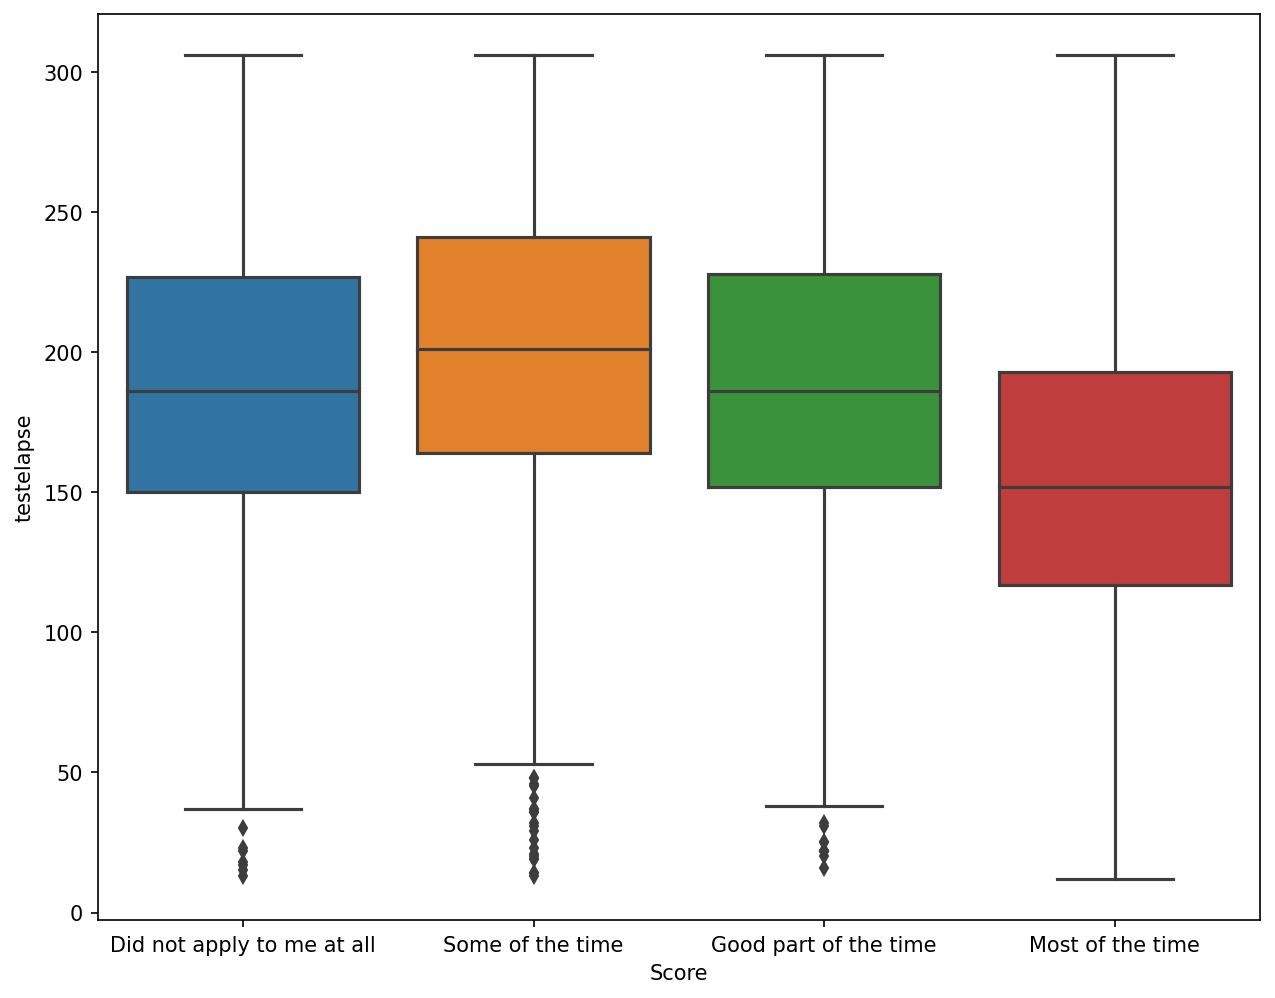

In [27]:
plt.figure(figsize = (10, 8), dpi = 150)
df = df.drop(df[df['testelapse'] > df['testelapse'].quantile(0.8)].index)
sns.boxplot(data = df, x = 'Score', y = 'testelapse', order = ['Did not apply to me at all', 'Some of the time', 'Good part of the time', 'Most of the time'])

So similar to what we saw in the boxplot for Q1, we can't really determine how depressed someone may be based on the amount of time it took them to complete the questionnare

Alright now lets take a look at everything other than the questions themselves, can we predict how depressed someone will be by looking at their personaility?

In [28]:
v_cols = []
for col in list(df.columns):
    if 'TIPI' in col:
        v_cols.append(col)
v_cols.append('Score')
#t = df[v_cols].apply(lambda x: np.nan if x == 0 else x)
t = df[v_cols].replace(0, np.nan).dropna()
X = t.drop('Score', axis = 1)
y = t['Score']

In [29]:

from sklearn.linear_model import LogisticRegressionCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
lg = LogisticRegressionCV(solver = 'saga', penalty='elasticnet', multi_class='multinomial', l1_ratios=[0, 0.2, 0.5, 0.7, 0.9], max_iter = 300)
lg.fit(X_train, y_train)

LogisticRegressionCV(l1_ratios=[0, 0.2, 0.5, 0.7, 0.9], max_iter=300,
                     multi_class='multinomial', penalty='elasticnet',
                     solver='saga')

In [30]:
y_pred = lg.predict(X_test)

In [31]:
print(classification_report(y_test, y_pred))

                            precision    recall  f1-score   support

Did not apply to me at all       0.64      0.41      0.50       929
     Good part of the time       0.55      0.67      0.60      2706
          Most of the time       0.00      0.00      0.00       672
          Some of the time       0.57      0.66      0.61      3087

                  accuracy                           0.57      7394
                 macro avg       0.44      0.43      0.43      7394
              weighted avg       0.52      0.57      0.54      7394



C:\Users\at488\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\at488\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\at488\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

So by using Logistic Regression we get an accuracy of 58%, much better than random chance but still not that great. Again, this makes sense because it's not exactly plausible to predict the severity of someone's depression just by looking at their personality, although it is definetely a handy indicator to have.

Okay so for the last thing I plan on doing, let's combine all of the personality questions along with the vocabulary and general questions to see if we can predict what someone's answer will be for the severity of their depression.

In [32]:
from sklearn.preprocessing import LabelEncoder
df_gen = df[['education', 'urban', 'gender', 'engnat', 'age', 'hand', 'religion', 'orientation', 'race', 'voted', 'married', 'familysize', 'country', 'VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10', 'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'testelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'Score']]
df_gen = df_gen.dropna()
lb = LabelEncoder()
df_gen['country'] = lb.fit_transform(df_gen['country'])

In [33]:
df_gen.head()

,education,urban,gender,engnat,age,hand,religion,orientation,race,voted,...,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,Score
0,2,3,2,2,16,1,12,1,10,2,...,5,7,7,7,7,7,5,1,1,Good part of the time
1,2,3,2,1,16,2,7,0,70,2,...,5,4,7,5,4,7,7,1,5,Good part of the time
2,2,3,2,2,17,1,4,3,60,1,...,5,2,2,5,6,5,5,3,2,Good part of the time
3,1,3,2,1,13,2,4,5,70,2,...,1,7,4,6,4,6,1,6,1,Some of the time
4,3,2,2,2,19,3,10,1,10,2,...,5,3,6,5,5,5,6,3,3,Good part of the time


In [34]:
from sklearn.model_selection import GridSearchCV
X = df_gen.drop('Score', axis = 1)
y = df_gen['Score']
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X, y, test_size=0.25, random_state=42)
#param_grid = {'n_estimators' : [200], 'criterion' : ['gini', 'entropy'], 'min_samples_leaf' : [1,2,3], 'bootstrap' : [False, True]}
#grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid)
#grid.fit(X_train, y_train)
rfc = RandomForestClassifier(bootstrap = True, criterion = 'entropy', min_samples_leaf = 3, n_estimators = 200)
rfc.fit(X_train_t, y_train_t)

RandomForestClassifier(criterion='entropy', min_samples_leaf=3,
                       n_estimators=200)

In [35]:
y_pred = rfc.predict(X_test_t)
print(classification_report(y_test_t, y_pred))

                            precision    recall  f1-score   support

Did not apply to me at all       0.70      0.39      0.50       963
     Good part of the time       0.59      0.65      0.62      2882
          Most of the time       0.71      0.16      0.26       643
          Some of the time       0.59      0.71      0.64      3169

                  accuracy                           0.60      7657
                 macro avg       0.65      0.48      0.51      7657
              weighted avg       0.61      0.60      0.58      7657



Alright so an accuracy of 61%, a bit higher than that of the logistic regression when just looking at the personality questions but not by much. This tells me that the personality questions play a significant role in determining the severity of depression while other general questions and being able to define a word doesn't tell much about the severity of depression

In [36]:
from keras.utils import np_utils
X = df_gen.drop('Score', axis = 1)
#X['testelapse'] = mn.fit_transform(X['testelapse'].values.reshape((-1, 1)))
y = lb.fit_transform(df_gen['Score'])
y = np_utils.to_categorical(y) #So apparently if you do multiclassification, keras wants it in multiple different columns

In [37]:
dummies = pd.get_dummies(X.drop('testelapse', axis = 1).astype(str), drop_first=True)
X = pd.concat([X['testelapse'], dummies], axis = 1).values

In [38]:
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train = mn.fit_transform(X_train)
X_test = mn.transform(X_test)

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [40]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "-1"
model = Sequential()
#input_dim is number of columns in X, number of neurons shoud be between number of columns in X (361) and number of target classes in y (4)
model.add(Dense(79, input_dim = 361, activation = 'relu'))
model.add(Dropout(rate = 0.3))

model.add(Dense(39, activation = 'relu'))
model.add(Dropout(rate = 0.3))

model.add(Dense(18, activation = 'relu'))
model.add(Dropout(rate = 0.3))

model.add(Dense(4, activation = 'softmax')) #softmax is for multi-classification

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

In [41]:
model.fit(X_train, y_train, epochs = 50, validation_data=(X_test, y_test))

Epoch 1/50
718/718 [==============================] - 2s 2ms/step - loss: 1.0906 - val_loss: 0.9272
Epoch 2/50
718/718 [==============================] - 1s 1ms/step - loss: 0.9805 - val_loss: 0.9036
Epoch 3/50
718/718 [==============================] - 1s 1ms/step - loss: 0.9511 - val_loss: 0.8932
Epoch 4/50
718/718 [==============================] - 1s 1ms/step - loss: 0.9358 - val_loss: 0.8876
Epoch 5/50
718/718 [==============================] - 1s 1ms/step - loss: 0.9181 - val_loss: 0.8887
Epoch 6/50
718/718 [==============================] - 1s 2ms/step - loss: 0.9097 - val_loss: 0.8868
Epoch 7/50
718/718 [==============================] - 1s 2ms/step - loss: 0.9011 - val_loss: 0.8887
Epoch 8/50
718/718 [==============================] - 1s 1ms/step - loss: 0.8873 - val_loss: 0.8892
Epoch 9/50
718/718 [==============================] - 1s 2ms/step - loss: 0.8802 - val_loss: 0.8911
Epoch 10/50
718/718 [==============================] - 1s 2ms/step - loss: 0.8691 - val_loss: 0.8952

In [42]:
y_pred_t = (model.predict(X_test) > 0.5).astype("int32")

In [43]:
print(classification_report(y_test, y_pred_t))

              precision    recall  f1-score   support

           0       0.60      0.42      0.49       963
           1       0.58      0.60      0.59      2882
           2       0.58      0.21      0.31       643
           3       0.59      0.60      0.59      3169

   micro avg       0.58      0.54      0.56      7657
   macro avg       0.58      0.46      0.50      7657
weighted avg       0.58      0.54      0.55      7657
 samples avg       0.54      0.54      0.54      7657



C:\Users\at488\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alright so Neural Networks ends up with an accuracy of about 56%, a bit lower than Random Forest but still a decent estimator of overall severity of depression.

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
#param_grid = {'loss' : ['deviance', 'exponential'], 'learning_rate' : [0.1, 1], 'n_estimators' : [120], 'max_depth' : [3,5]}
#grid = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid)
#grid.fit(X_train_t, y_train_t)
gbd = GradientBoostingClassifier(n_estimators =  150)
gbd.fit(X_train_t, y_train_t)

GradientBoostingClassifier(n_estimators=150)

In [45]:
y_pred = gbd.predict(X_test_t)
print(classification_report(y_test_t, y_pred))

                            precision    recall  f1-score   support

Did not apply to me at all       0.67      0.45      0.54       963
     Good part of the time       0.60      0.65      0.63      2882
          Most of the time       0.63      0.28      0.39       643
          Some of the time       0.60      0.69      0.64      3169

                  accuracy                           0.61      7657
                 macro avg       0.63      0.52      0.55      7657
              weighted avg       0.61      0.61      0.60      7657



Just like Random Forest, Gradient Boosting also ends up with an accuracy of 61%.

In [48]:
from sklearn.svm import SVC
#param_grid = {'C' : [0.1, 1], 'kernel': ['poly', 'rbf']}
#grid = GridSearchCV(SVC(), param_grid)
X = df_gen.drop('Score', axis = 1)
y = df_gen['Score']
dummies = pd.get_dummies(X.drop('testelapse', axis = 1).astype(str), drop_first=True)
X = pd.concat([X['testelapse'], dummies], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train = mn.fit_transform(X_train)
X_test = mn.transform(X_test)
svc = SVC()
svc.fit(X_train, y_train)
#grid.fit(X_train, y_train)

SVC()

In [49]:
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

                            precision    recall  f1-score   support

Did not apply to me at all       0.70      0.38      0.49       963
     Good part of the time       0.59      0.65      0.62      2882
          Most of the time       0.71      0.09      0.17       643
          Some of the time       0.59      0.72      0.65      3169

                  accuracy                           0.60      7657
                 macro avg       0.65      0.46      0.48      7657
              weighted avg       0.61      0.60      0.58      7657



Alright well SVC comes pretty close to Random Forest and Gradient Boosting but still has less accuracy.

Alright that's all for my dataset! I hope you've enjoyed reading my work and feel free to leave a like or any comments. Have a great day!